# **Netflix Movies and TV Shows Dataset (EDA)**

### **🎯 Problem Statement**
what type of content dataset has,
how it has evolved over time, and
what patterns exist across countries, genres, ratings, and duration.

🔗 For more EDA projects, visit my GitHub repository:

GitHub Repository: https://github.com/vishwadesai-ds/EDA-Projects

### **Import libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")

### **Import Dataset**

In [ ]:
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### **Phase 0 :** Problem Context

This dataset contains information about movies and TV shows available on Netflix, including content type, country, rating, and release details.

### **Phase 1 :** Data Overview
**Step 1 :** understand

rows, columns, type of data, numeric categorical columns

In [ ]:
#dataset shape
df.shape

(8807, 12)

In [ ]:
#datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### **Phase 2 :** Column understanding

In [ ]:
#columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
#quick statistics
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


### **Phase 3 :** Missing value analysis

In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
df.duplicated().sum()

np.int64(0)

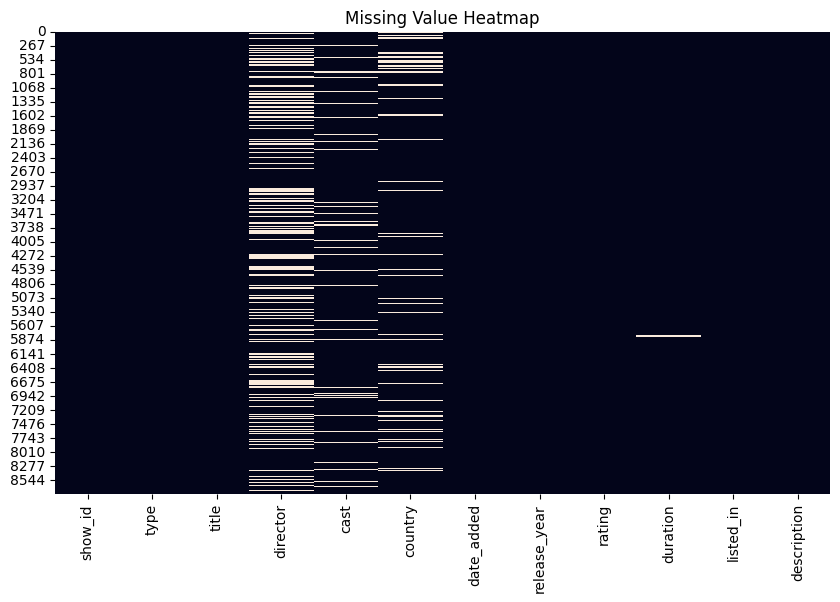

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Value Heatmap")
plt.show()

### **Phase 4 :** Data Cleaning & Imputation

In [ ]:
df['rating'] = df['rating'].fillna(df['rating'].mode())

Though director, cast, country has many missing values but its natural so keeping them is not going to change analysis

### **Phase 5 :** Univariate analysis

##### 5A. Movies vs TV Shows

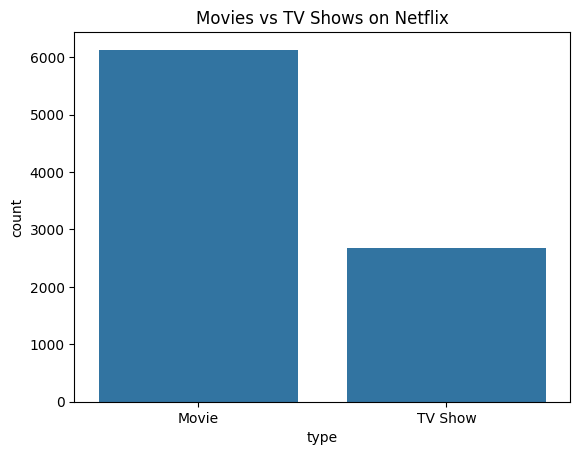

In [ ]:
sns.countplot(x='type', data=df)
plt.title('Movies vs TV Shows on Netflix')
plt.show()

##### 5B. Rating Distribution

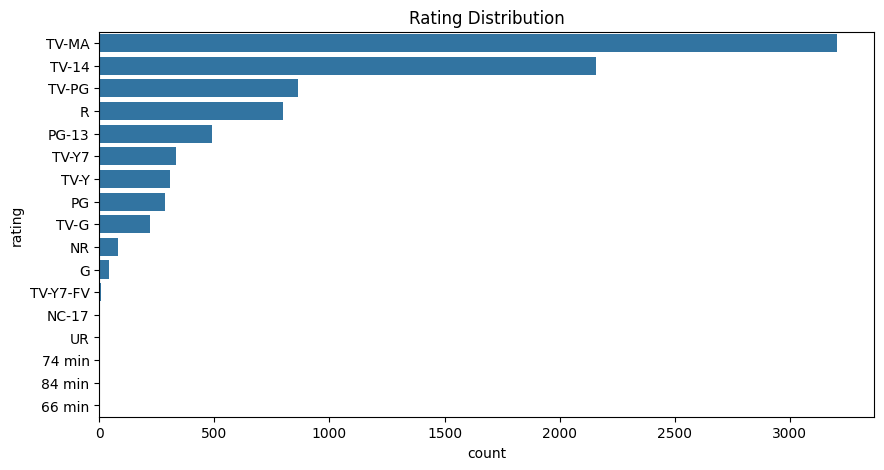

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index)
plt.title('Rating Distribution')
plt.show()

here I got to know that rating column has some duration values which was not good so need to correct it first

##### **Fix :** identify wrong ratings

In [ ]:
df[df['rating'].str.contains('min', na=False)]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


##### **Fix :** Move the back to duration

In [ ]:
df.loc[df['rating'].str.contains('min', na=False), 'rating'] = np.nan

In [ ]:
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

A small number of records contained duration values incorrectly placed in the rating column. These values were removed and treated as missing, as they did not materially impact overall duration analysis.

##### 5C. Country Distribution (Top 10)

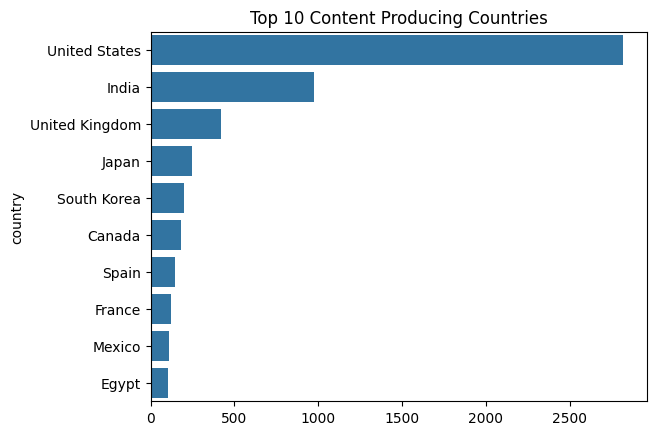

In [ ]:
top_countries = df['country'].value_counts().head(10)

sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Content Producing Countries')
plt.show()

##### 5D. Release Year Distribution

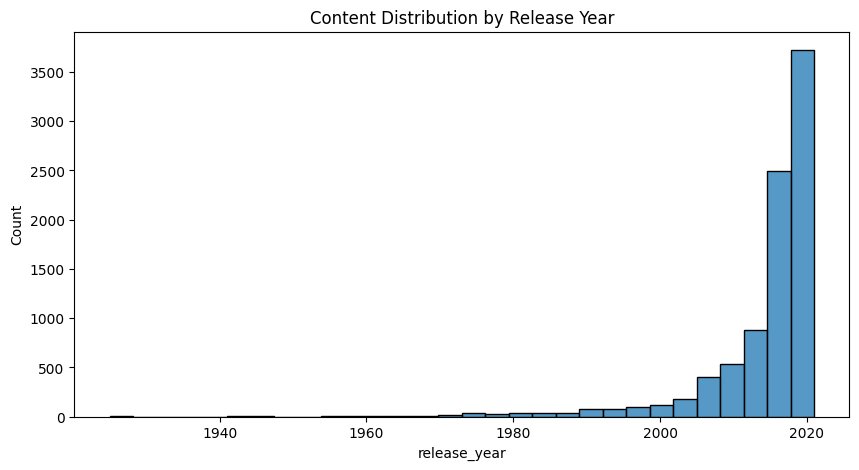

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['release_year'], bins=30)
plt.title('Content Distribution by Release Year')
plt.show()

### **Phase 6 :** Bivariate analysis

##### 6A. Type vs Rating

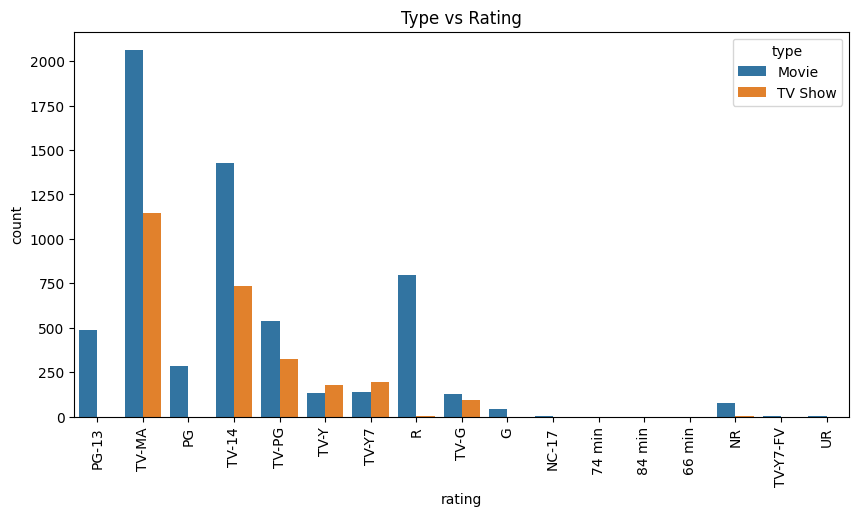

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='rating', hue='type', data=df)
plt.xticks(rotation=90)
plt.title('Type vs Rating')
plt.show()

##### 6B. Type vs Country (Top 5 Countries)

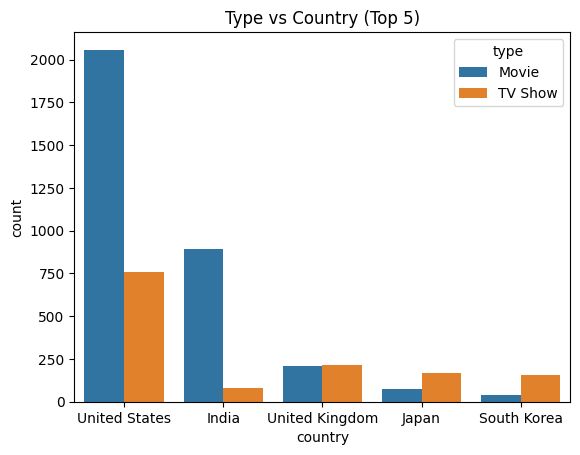

In [ ]:
top5 = df['country'].value_counts().head(5).index
df_top5 = df[df['country'].isin(top5)]

sns.countplot(x='country', hue='type', data=df_top5)
plt.title('Type vs Country (Top 5)')
plt.show()

##### 6C. Rating vs Release Year

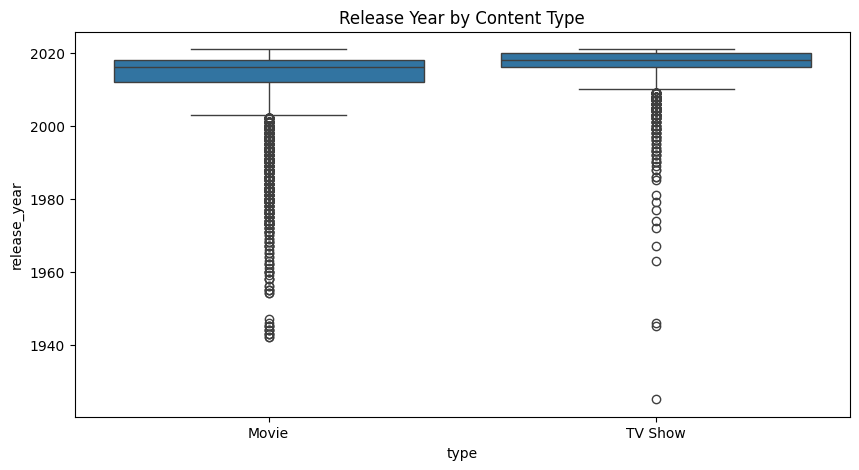

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='type', y='release_year', data=df)
plt.title('Release Year by Content Type')
plt.show()


### **Phase 7 :** Feature engineering

##### 7A. Convert date_added to datetime

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

##### 7B. Extract Year & Month from date_added

In [ ]:
df['added_year'] = df['date_added'].dt.year
df['added_month'] = df['date_added'].dt.month

##### 7C. Duration Parsing

In [ ]:
df.loc[df['type'] == 'Movie', 'duration_minutes'] = (
    df.loc[df['type'] == 'Movie', 'duration']
      .str.replace(' min', '', regex=False)
      .astype(float)
)

df.loc[df['type'] == 'TV Show', 'seasons'] = (
    df.loc[df['type'] == 'TV Show', 'duration']
      .str.replace(' Seasons', '', regex=False)
      .str.replace(' Season', '', regex=False)
      .astype(float)
)

##### 7D. Genre Splitting

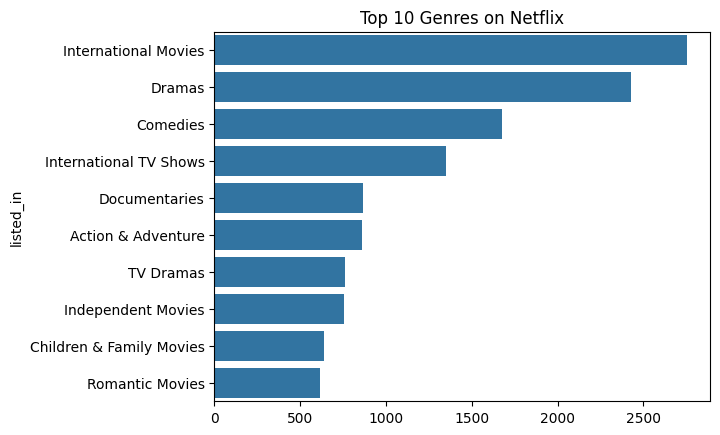

In [ ]:
genres = df['listed_in'].str.split(', ').explode()
top_genres = genres.value_counts().head(10)

sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title('Top 10 Genres on Netflix')
plt.show()

### **Phase 8 :** Final insights & Conclusion

• Netflix’s content library is dominated by movies, although TV shows form a significant portion of the catalog.

• The platform primarily targets mature audiences, with TV-MA being the most frequent content rating.

• The United States is the largest contributor to Netflix content, followed by a small number of other countries, indicating geographic concentration.

• There has been a sharp increase in content production and addition to Netflix after 2015, reflecting platform expansion.

• Drama emerges as the most common genre across both movies and TV shows on Netflix.

• Most movies on Netflix have durations between 80 and 120 minutes, while TV shows commonly have one to two seasons.

• Some data quality issues such as missing values and misclassified entries were identified and addressed during the data cleaning phase.